In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T.dot(y))
theta_best

array([[4.07064883],
       [3.03648577]])

In [2]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.07064883],
       [10.14362038]])

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
eta = 0.01  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[4.0661096 ],
       [3.04030939]])

In [5]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
theta

array([[4.09607256],
       [3.02907146]])

In [6]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=1000,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [7]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.11693668]), array([3.07014741]))

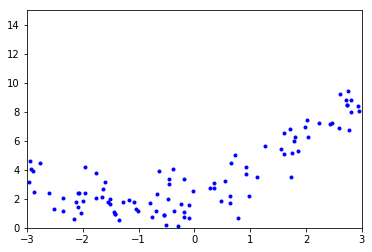

In [8]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, y, "b.")
plt.axis([-3, 3, 0, 15])
plt.show()

In [9]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [10]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.09669684]), array([[1.00447026, 0.48478667]]))

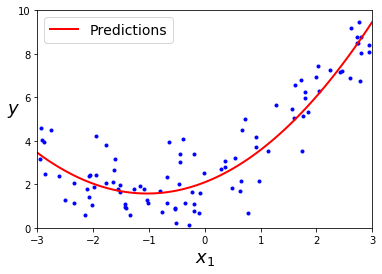

In [11]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

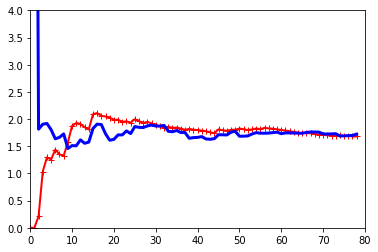

In [13]:
lin_reg = LinearRegression()
plt.axis([0, 80, 0, 4])
plot_learning_curves(lin_reg, X, y)

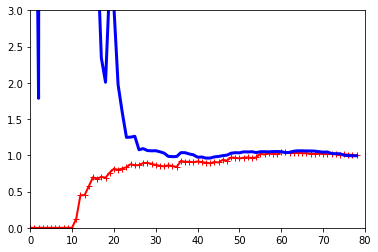

In [14]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])
plt.axis([0, 80, 0, 3])
plot_learning_curves(polynomial_regression, X, y)

In [15]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [16]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [17]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([1.12795912])

In [18]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [19]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

In [20]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler 

# prepare the data
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

NameError: name 'X_train' is not defined

In [21]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

In [23]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

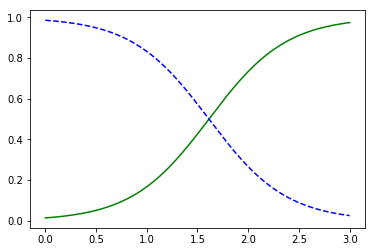

In [24]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

In [25]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

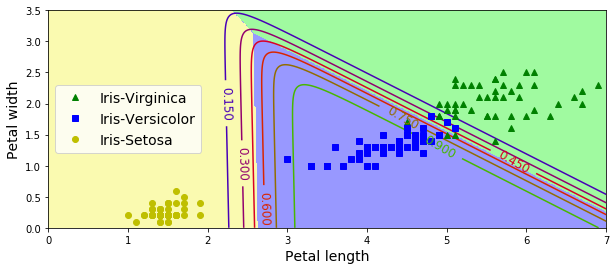

In [27]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [28]:
print("Excercises")

Excercises


In [32]:
print("1. What Linear Regression training algorithm can you use if you have a training set with millions of features?")
print("\nA: I should you mini-batch gradient descent, this one works fine with very big number of features, instead of algorithms like SVM and LinearRegression.")

1. What Linear Regression training algorithm can you use if you have a training set with millions of features?

A: I should you mini-batch gradient descent, this one works fine with very big number of features, instead of algorithms like SVM and LinearRegression.


In [33]:
print("2. Suppose the features in your training set have very different scales. What algorithms might suffer from this, and how? What can you do about it?")
print("\nA: I can use StandardScaler of sklearn lib to solve this issue. Or use LinearRegression.")

2. Suppose the features in your training set have very different scales. What algorithms might suffer from this, and how? What can you do about it?

A: I can use StandardScaler of sklearn lib to solve this issue. Or use LinearRegression.


In [34]:
print("3. Can Gradient Descent get stuck in a local minimum when training a Logistic Regression model?")
print("\nA: Yes, of course.")

3. Can Gradient Descent get stuck in a local minimum when training a Logistic Regression model?

A: Yes, of course.


In [35]:
print("4. Do all Gradient Descent algorithms lead to the same model provided you let them run long enough?")
print("\nA: No, i.e. SGD can be trained not on all samples and make another model instead of another algorithms. They are some different.")

4. Do all Gradient Descent algorithms lead to the same model provided you let them run long enough?

A: No, i.e. SGD can be trained not on all samples and make another model instead of another algorithms. They are some different.


In [37]:
print("5. Suppose you use Batch Gradient Descent and you plot the validation error at every epoch. If you notice that the validation error consistently goes up, what is likely going on? How can you fix this?")
print("\nA: The reason mostly is overfitting. There are several ways to improve results. I.e. simplify model, add new training samples, reduce variance. Also may help early stopping of training.")

5. Suppose you use Batch Gradient Descent and you plot the validation error at every epoch. If you notice that the validation error consistently goes up, what is likely going on? How can you fix this?

A: The reason mostly is overfitting. There are several ways to improve results. I.e. simplify model, add new training samples, reduce variance. Also may help early stopping of training.


In [38]:
print("6. Is it a good idea to stop Mini-batch Gradient Descent immediately when the validation error goes up?")
print("\nA: Yes, because this mostly means that model is overfitting and later results will be worse. We should save the best model.")

6. Is it a good idea to stop Mini-batch Gradient Descent immediately when the validation error goes up?

A: Yes, because this mostly means that model is overfitting and later results will be worse. We should save the best model.


In [40]:
print("7. Which Gradient Descent algorithm (among those we discussed) will reach the vicinity of the optimal solution the fastest? Which will actually converge? How can you make the others converge as well?")
print("\nA: Batch GD is faster in reaching optimum, but has some troubles. In my opinion the best GD alg is mini-batch type.")

7. Which Gradient Descent algorithm (among those we discussed) will reach the vicinity of the optimal solution the fastest? Which will actually converge? How can you make the others converge as well?

A: Batch GD is faster in reaching optimum, but has some troubles. In my opinion the best GD alg is mini-batch type.


In [41]:
print("8. Suppose you are using Polynomial Regression. You plot the learning curves and you notice that there is a large gap between the training error and the validation error. What is happening? What are three ways to solve this?")
print("\nA: This maybe underfitting, there we should use more complex model. In this case, using Polynomial Regression we can increase degree of features that are being created.")

8. Suppose you are using Polynomial Regression. You plot the learning curves and you notice that there is a large gap between the training error and the validation error. What is happening? What are three ways to solve this?

A: This maybe underfitting, there we should use more complex model. In this case, using Polynomial Regression we can increase degree of features that are being created.


In [44]:
print("9. Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter α or reduce it?")
print("\nA: Here is high bias, and I should decrease a hyperparameter. Or ise Lasso.")

9. Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter α or reduce it?

A: Here is high bias, and I should decrease a hyperparameter.


In [49]:
print("10. Why would you want to use: \n* Ridge Regression instead of plain Linear Regression (i.e., without any regularization)? \n* Lasso instead of Ridge Regression? \n* Elastic Net instead of Lasso?")
print("\nA: 1) Models with Ridge often has better score.")
print("   2) Lasso should be used instead of Ridge when we know that there is only few features which are important.")
print("   3) Elastico is more flexible, this one can't be worse in any case.")

10. Why would you want to use: 
* Ridge Regression instead of plain Linear Regression (i.e., without any regularization)? 
* Lasso instead of Ridge Regression? 
* Elastic Net instead of Lasso?

A: 1) Models with Ridge often has better score.
   2) Lasso should be used instead of Ridge when we know that there is only few features which are important.
   3) Elastico is more flexible, this one can't be worse in any case.


In [50]:
print("11. Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime. Should you implement two Logistic Regression classifiers or one Softmax Regression classifier?")
print("\nA: I should use two Logistic Regression classifiers.")

11. Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime. Should you implement two Logistic Regression classifiers or one Softmax Regression classifier?

A: I should use two Logistic Regression classifiers.


In [51]:
print("12. Implement Batch Gradient Descent with early stopping for Softmax Regression (without using Scikit-Learn).")

12. Implement Batch Gradient Descent with early stopping for Softmax Regression (without using Scikit-Learn).


In [54]:
class BatchGradientDescent:
    
    def fit(X, y):
        
    def score(X, y):
        
    